# Import Library & Connect to Gdrive

Import the libraries for data analysis and processing

In [ ]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

Connect Google Drive to the Colab session in the specified directory (in this example, inside /content/drive). This allows access to files on Google Drive directly from the Colab notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Understanding


## **Build Dataframe**

Load data from an Excel file
* Line 1: Define the variable 'file_path' containing the path to the Excel file to be loaded.
* Line 2: Use the 'read_excel' function from pandas to read the Excel file at the specified path (file_path) and store it in the 'data' variable.
* Line 3: Use the 'head()' method on the DataFrame to display the first few rows of the loaded data.

The entire code snippet is used to load data from an Excel file into a DataFrame using pandas and then display the first few rows of that data.


In [ ]:
file_path = "/content/drive/MyDrive/Ilapak 12 (September-November).xlsx"
data = pd.read_excel(file_path)
data.head()

,id,times,Shift,Status,Suhu Sealing Vertikal Bawah (oC),Suhu Sealing Vertical Atas (oC),Suhu Sealing Horizontal Depan/Kanan (oC),Suhu Sealing Horizontal Belakang/Kiri (oC)
0,99943,2023-09-01 06:29:25,0,0,0.0,0.0,0.0,0.0
1,99944,2023-09-01 06:31:14,3,1,43.1,38.2,50.8,53.6
2,99945,2023-09-01 06:36:14,3,1,91.5,91.6,144.7,150.5
3,99946,2023-09-01 06:41:14,3,1,132.3,129.5,208.0,212.2
4,99947,2023-09-01 06:46:14,1,1,164.0,158.2,229.8,229.7


* The provided code line uses the pd.to_datetime function from the pandas library to convert the values in the ‘times’ column of the DataFrame ‘data’ into datetime format.
* This conversion ensures that the values in the ‘times’ column are treated as timestamps, allowing for easier manipulation and analysis.

In [ ]:
"""
Convert the column named 'times' in the DataFrame 'data' to datetime data type
"""

data['times'] = pd.to_datetime(data['times'])

In [ ]:
def overview(data: pd.DataFrame, timestamp_col: str = None) -> None:

    """
    Provides an overview of the DataFrame, including information about missing values,
    data types, and, if a timestamp column is provided, the date range.
    """

    print('Null Count:\n', data.isnull().sum(),'\n')
    print('Data Types:\n', data.dtypes)

    if timestamp_col is not None:
        print('\nDate Range:\n\nStart:\t',data[timestamp_col].min())
        print('End:\t',data[timestamp_col].max())
        print('Days:\t',(data[timestamp_col].max() - data[timestamp_col].min()))

In [ ]:
overview(data, timestamp_col='times')

Null Count:
 id                                            0
times                                         0
Shift                                         0
Status                                        0
Suhu Sealing Vertikal Bawah (oC)              0
Suhu Sealing Vertical Atas (oC)               0
Suhu Sealing Horizontal Depan/Kanan (oC)      0
Suhu Sealing Horizontal Belakang/Kiri (oC)    0
dtype: int64 

Data Types:
 id                                                     int64
times                                         datetime64[ns]
Shift                                                  int64
Status                                                 int64
Suhu Sealing Vertikal Bawah (oC)                     float64
Suhu Sealing Vertical Atas (oC)                      float64
Suhu Sealing Horizontal Depan/Kanan (oC)             float64
Suhu Sealing Horizontal Belakang/Kiri (oC)           float64
dtype: object

Date Range:

Start:	 2023-09-01 06:29:25
End:	 2023-11-29 07:58:19
Days:

The dataset contains the following three data types (dtypes):

* **times** : This column represents timestamps and is of type datetime64[ns].
* **Shift**: An integer column with type int64.
* **Suhu Sealing Vertikal Bawah**: A floating-point column with type float64.
* **Suhu Sealing Vertical Atas** : Another floating-point column with type float64.
* **Suhu Sealing Horizontal Depan/Kanan** : A floating-point column with type float64.
* **Suhu Sealing Horizontal Belakang/Kiri** : Yet another floating-point column with type float64.

## **Drop Unnecessary Columns/Rows**

The provided code snippet performs the following actions on the DataFrame named data:

1. Column Selection and Renaming:

    * It selects specific columns from the DataFrame: ‘times’, ‘Suhu Sealing Vertikal Bawah (oC)’, and ‘Suhu Sealing Vertikal Bawah (oC)’.
    * The column ‘Suhu Sealing Vertikal Bawah (oC)’ is renamed to ‘suhu_sealing_vertical_bawah’.
    * The column ‘Suhu Sealing Vertikal Bawah (oC)’ is renamed to ‘suhu_sealing_vertical_atas’.
    * The ‘times’ column is renamed to ‘datetime’.
    * The resulting DataFrame is stored in a new variable called df.
2. DataFrame Overview:
    * The variable df now contains a new DataFrame with only three selected columns, and their names have been modified according to the instructions provided in the rename() method.
    
This process effectively drops unnecessary columns and prepares a more focused DataFrame for further analysis.

In [ ]:
# Select relevant columns and rename them
df = data[['times','Suhu Sealing Vertikal Bawah (oC)', 'Suhu Sealing Vertical Atas (oC)']].rename(columns={'Suhu Sealing Vertikal Bawah (oC)': 'suhu_sealing_vertical_bawah', 'times': 'datetime', 'Suhu Sealing Vertical Atas (oC)': 'suhu_sealing_vertical_atas'})

In [ ]:
df.head()

,datetime,suhu_sealing_vertical_bawah,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,0.0,0.0
1,2023-09-01 06:31:14,43.1,38.2
2,2023-09-01 06:36:14,91.5,91.6
3,2023-09-01 06:41:14,132.3,129.5
4,2023-09-01 06:46:14,164.0,158.2


## **Check the number of rows and columns**



In [ ]:
"""
 Check the number of rows and columns in the DataFrame 'df'
"""

print("Rows and Columns = ", df.shape)

Rows and Columns =  (7622, 3)


## **Stastical Description**

The provided code snippet utilizes the describe() method on the DataFrame df to generate a statistical summary for the numeric columns. The T operation transposes the summary statistics for easier readability. The describe() method provides information such as the mean, standard deviation, minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum for each numeric column.

In [ ]:
df.head()

,datetime,suhu_sealing_vertical_bawah,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,0.0,0.0
1,2023-09-01 06:31:14,43.1,38.2
2,2023-09-01 06:36:14,91.5,91.6
3,2023-09-01 06:41:14,132.3,129.5
4,2023-09-01 06:46:14,164.0,158.2


In [ ]:
df.dtypes

datetime                       datetime64[ns]
suhu_sealing_vertical_bawah           float64
suhu_sealing_vertical_atas            float64
dtype: object

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,7622,2023-10-17 01:07:27.721857792,2023-09-01 06:29:25,2023-09-22 16:55:02,2023-10-17 08:36:16.500000,2023-11-08 14:37:16,2023-11-29 07:58:19,NaN
suhu_sealing_vertical_bawah,7622.0,222.565783,0.0,234.2,234.4,239.0,243.0,45.036489
suhu_sealing_vertical_atas,7622.0,218.052125,-2313.1,229.2,229.4,234.2,245.7,67.948703


Here’s a breakdown of the stastical description:

1. Count:
    * The non-null (non-missing) entries in the ‘suhu_sealing_vertical_bawah’ and ‘suhu_sealing_vertical_atas’ columns total 7622.
2. Mean:
    * The average value of the ‘suhu_sealing_vertical_bawah’ column is 222.56.
    * The average value of the ‘suhu_sealing_vertical_atas’ column is 218.05.
3. Standard Deviation (std):
    * The standard deviation indicates how spread out the values are within the data.
    * The standard deviation for the ‘suhu_sealing_vertical_bawah’ column is 45.036.
    * The standard deviation for the ‘suhu_sealing_vertical_atas’ column is 67.948.
4. Minimum (min):
    * The minimum value in the ‘suhu_sealing_vertical_bawah’ column is 0.
    * The minimum value in the ‘suhu_sealing_vertical_atas’ column is -2313.1.
5. Quartiles:
    * The first quartile (Q1) represents the value below which 25% of the data falls.
    * The median (Q2) represents the value below which 50% of the data falls.
    * The third quartile (Q3) represents the value below which 75% of the data falls.
6. Maximum (max):
    * The maximum value in both the ‘suhu_sealing_vertical_bawah’ and ‘suhu_sealing_vertical_atas’ columns.

From this statistical description, we can conclude that the ‘suhu_sealing_vertical_atas’ column contains an extreme minimum value of -2313.1 degrees Celsius. Such extreme values are known as outliers, and preprocessing steps are necessary to handle them in the ‘suhu_sealing_vertical_atas’ data.

## Data Visualization

* X-Axis (Horizontal Axis): The X-axis represents time, measured in minutes.
* Y-Axis (Vertical Axis): The Y-axis represents temperature, measured in degrees Celsius.
* Line: The line on the graph represents the temperature of the lower sealing at 5-minute intervals.
* Dots: The dots on the graph indicate specific temperature values of the lower sealing at 5-minute intervals.



### Suhu Sealing Vertikal Bawah

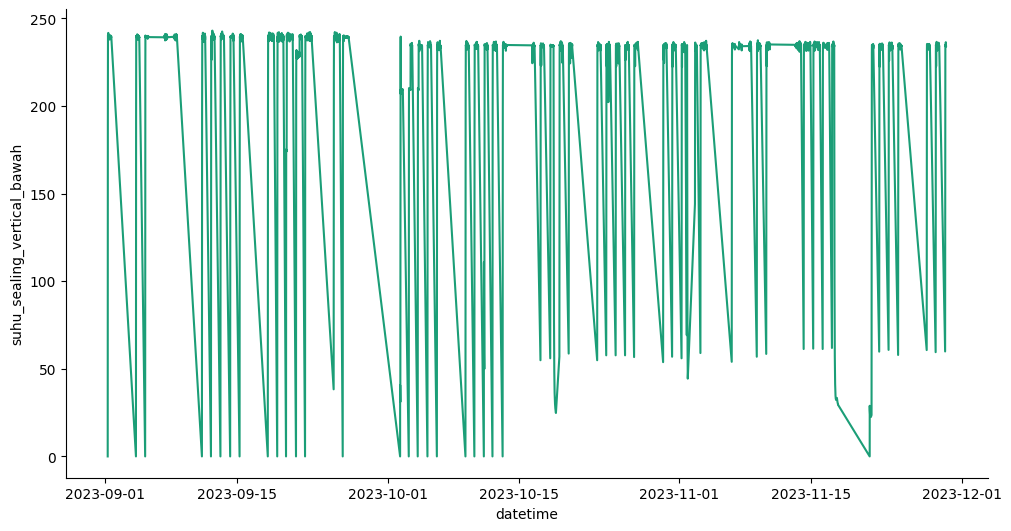

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['suhu_sealing_vertical_bawah']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('suhu_sealing_vertical_bawah')

### Suhu Sealing Vertical Atas

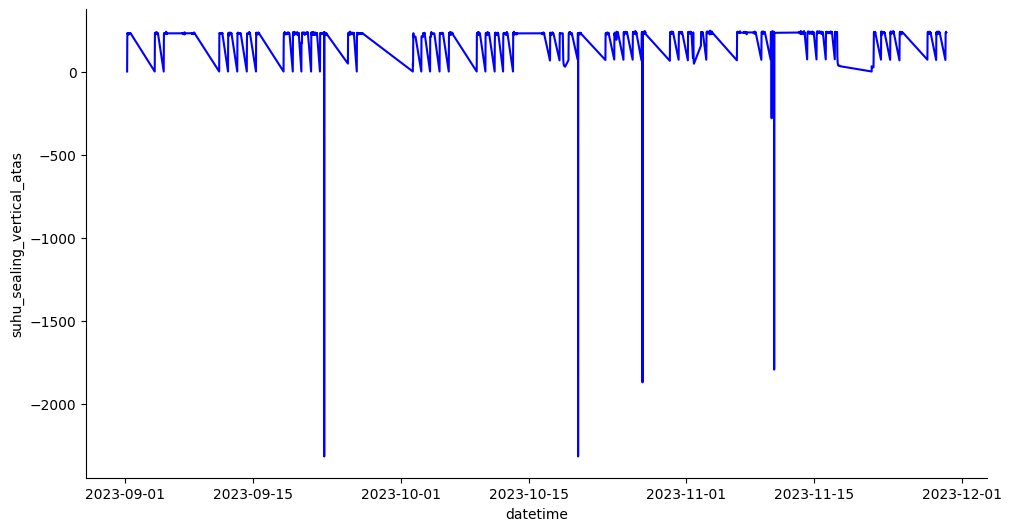

In [ ]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['datetime']
    ys = series['suhu_sealing_vertical_atas']

    plt.plot(xs, ys, label=series_name, color='blue')  # Change the color parameter to 'blue'

fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)  # Change layout='constrained' to constrained_layout=True
df_sorted = df.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('suhu_sealing_vertical_atas')

plt.show()


# Data preprocessing

## **Cek unique values**

To examine the unique values in each column of the DataFrame, we’ll create a function called unique_value(). This function will print the distinct values for each column. Let’s proceed by calling the unique_value() function to display the unique values in each column of the DataFrame.

In [ ]:

def unique_value():
    """
    Prints the unique values for each column in the given DataFrame.
    """
    for i in df.columns:
        print(i, df[i].unique())
        print('\n')


# Call the unique_value() function on the DataFrame 'df'
unique_value()

datetime <DatetimeArray>
['2023-09-01 06:29:25', '2023-09-01 06:31:14', '2023-09-01 06:36:14',
 '2023-09-01 06:41:14', '2023-09-01 06:46:14', '2023-09-01 06:51:14',
 '2023-09-01 06:56:14', '2023-09-01 07:01:14', '2023-09-01 07:06:14',
 '2023-09-01 07:11:14',
 ...
 '2023-11-29 07:13:37', '2023-11-29 07:18:19', '2023-11-29 07:23:19',
 '2023-11-29 07:28:19', '2023-11-29 07:33:19', '2023-11-29 07:38:19',
 '2023-11-29 07:43:19', '2023-11-29 07:48:19', '2023-11-29 07:53:19',
 '2023-11-29 07:58:19']
Length: 7619, dtype: datetime64[ns]


suhu_sealing_vertical_bawah [  0.   43.1  91.5 132.3 164.  189.3 209.7 226.2 238.  240.3 239.9 238.5
 238.6 237.9 241.7 238.3 240.  239.3 239.4 239.6 239.1 239.2 239.5 239.
 240.2 239.7  46.4  94.2 135.  167.2 193.2 214.2 231.2 238.8 240.9 237.8
 240.5 238.7 240.1 238.4 239.8  64.4 111.6 148.4 177.6 201.2 220.1 234.6
 237.4 241.1 241.  240.8 238.1 240.4  29.5  77.3 118.4 150.1 175.1 195.2
 211.6 224.7 235.3 241.8 237.3 236.5 241.3  61.3 107.3 142.3 170.  192.1

## **Adjust outlier for Suhu Sealing Vertical Atas**

In the 'suhu_sealing_vertical_atas' column, there are extremely low temperature values, with the lowest being -2313.1. To address these outliers, we will employ the winsorization method in this step.

### **Winsorization**

1. Purpose:

    The winsorization process aims to handle outliers in the data by replacing extremely high or extremely low values with predetermined upper and lower limits. This is done to reduce the impact of outliers on statistical data analysis.

2. Function:

    The winsorize() function from the pandas library is used to apply the winsorization technique to the data. This function takes the following parameters:
      * A numeric data series to which winsorization will be applied
      * Lower and upper limit parameters in decimal form to determine the minimum and maximum value limits. In this case, 2.5% and 97.5% are used.

3. Hpw to work:
    
    In general, the winsorize() function will:
     * Sort the data from the smallest to the largest value
     * Identify the value at the lower limit percentile (2.5%) as the lower limit
     * Identify the value at the upper limit percentile (97.5%) as the upper limit
     * Change values below the lower limit to the lower limit value
     * Change values above the upper limit to the upper limit value
     * Return the winsorized numeric data series

By applying winsorization, the impact of extreme outliers on the 'suhu_sealing_vertical_atas' column will be mitigated, allowing for more reliable statistical analyses and inferences.


reference : https://www.statology.org/winsorize/

In [ ]:
"""
import library
"""

from scipy.stats.mstats import winsorize

In [ ]:
"""
define lower limit
"""

df['suhu_sealing_vertical_atas'].quantile(0.025)

34.9

In [ ]:
"""
define upper limit
"""

df['suhu_sealing_vertical_atas'].quantile(0.975)

234.9

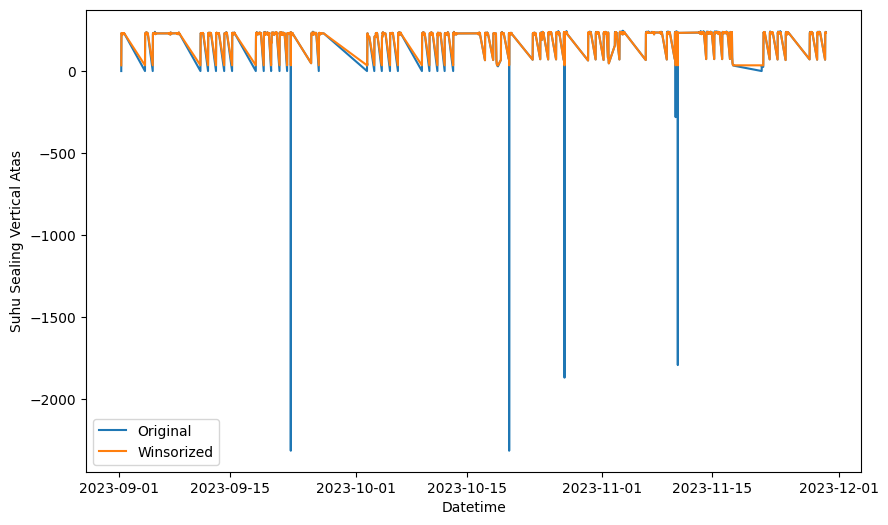

In [ ]:

"""
Winsorize the 'suhu_sealing_vertical_atas' column:
   - Winsorization is performed using the `winsorize` function.
   - The limits (0.025, 0.025) indicate that the top and bottom 2.5% of values will be replaced.
   - The resulting winsorized values are stored in the variable `winsorized_values`.

Parameters:
- `df`: Input DataFrame containing temperature data.
- `winsorized_values`: Series with winsorized temperature values.

"""


# Make sure your DataFrame is sorted by datetime
df_adjustOutlier = df.sort_values('datetime')

# Applying winsorize to the 'suhu_sealing_vertical_atas' column
winsorized_values = winsorize(df_adjustOutlier['suhu_sealing_vertical_atas'], limits=(0.025, 0.025))

# Creating a new DataFrame with winsorized values
df_adjustOutlier = pd.DataFrame({'datetime': df_adjustOutlier['datetime'], 'suhu_sealing_vertical_atas': winsorized_values})

# Plotting the original and winsorized time series
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['suhu_sealing_vertical_atas'], label='Original')
plt.plot(df['datetime'], winsorized_values, label='Winsorized')
plt.xlabel('Datetime')
plt.ylabel('Suhu Sealing Vertical Atas')
plt.legend()
plt.show()


In [ ]:
df_adjustOutlier.head()

,datetime,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,34.9
1,2023-09-01 06:31:14,38.2
2,2023-09-01 06:36:14,91.6
3,2023-09-01 06:41:14,129.5
4,2023-09-01 06:46:14,158.2


In [ ]:
df_adjustOutlier.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,7622,2023-10-17 01:07:27.721857792,2023-09-01 06:29:25,2023-09-22 16:55:02,2023-10-17 08:36:16.500000,2023-11-08 14:37:16,2023-11-29 07:58:19,NaN
suhu_sealing_vertical_atas,7622.0,219.372632,34.9,229.2,229.4,234.2,234.9,41.580801


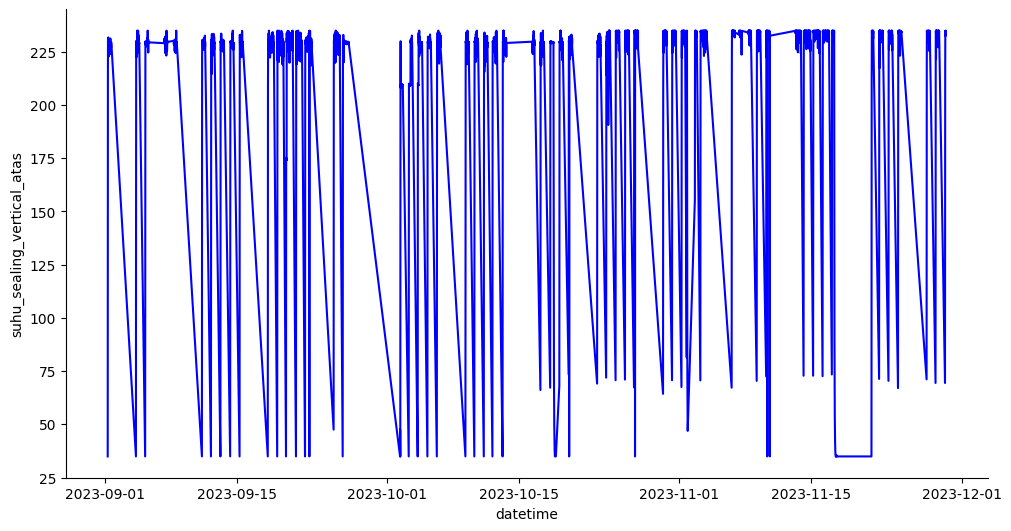

In [ ]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['datetime']
    ys = series['suhu_sealing_vertical_atas']

    plt.plot(xs, ys, label=series_name, color='blue')

fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)
df_sorted = df_adjustOutlier.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('suhu_sealing_vertical_atas')

plt.show()


### Save Data

After preprocessing the data, we will save it in CSV format for both the vertical lower sealing temperature (`suhu_sealing_bawah`) and the vertical upper sealing temperature (`suhu_sealing_atas`).

In [ ]:
# Save 'suhu_sealing_vertical_bawah' as a CSV file
df[['datetime', 'suhu_sealing_vertical_bawah']].to_csv('suhu_sealing_vertical_bawah.csv', index=False)

# Save the winsorized 'suhu_sealing_vertical_atas' data to a CSV file
df_adjustOutlier.to_csv('suhu_sealing_vertical_atas.csv', index=False)

# Data Cleansing

The goal of data cleansing in this case is to prepare the temperature data for forecasting during normal machine operation periods. By focusing on the operational temperature range, the prediction accuracy within the range where the machine is actively running can potentially be improved. One of the techniques applied during the data cleansing stage is removing noise or irrelevant data points from periods when the machine is turned off.

## Suhu Sealing Vertikal Bawah

### Test Rolling Average


In time series analysis, a rolling average (also known as a moving average) is a technique used to smooth out short-term fluctuations and highlight long-term trends in the data. The rolling average is calculated by taking the average of a subset of data points from the time series, with the subset "rolling" or moving forward over time.

In [ ]:
#### Import Data

file_path = '/content/drive/MyDrive/suhu_sealing_vertical_bawah.csv'
data_mean = pd.read_csv(file_path)

data_mean.head(15)

,datetime,suhu_sealing_vertical_bawah
0,2023-09-01 06:29:25,0.0
1,2023-09-01 06:31:14,43.1
2,2023-09-01 06:36:14,91.5
3,2023-09-01 06:41:14,132.3
4,2023-09-01 06:46:14,164.0
5,2023-09-01 06:51:14,189.3
6,2023-09-01 06:56:14,209.7
7,2023-09-01 07:01:14,226.2
8,2023-09-01 07:06:14,238.0
9,2023-09-01 07:11:14,240.3


#### Find Threshold

The purpose of this code is to identify and separate non-operational temperatures from the dataset, which can be useful for focusing on data relevant to normal machine operation and potentially improving prediction accuracy within the operational temperature range.

In [ ]:
#Import Library

from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-26-1216be05f440>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cluster'] = cluster_labels


Initial K-means Calculated threshold: 192.5
Refined Statistical Calculated threshold: 151.5


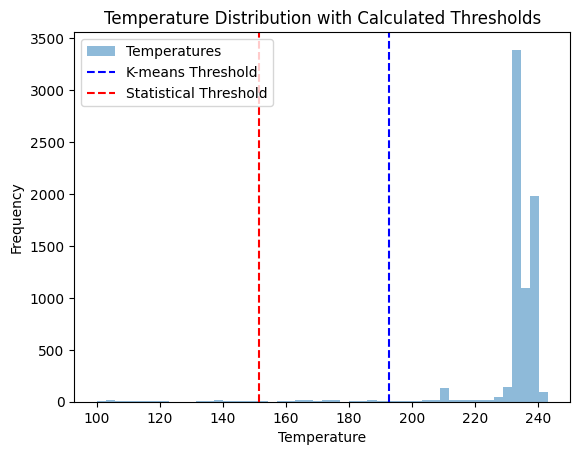

In [ ]:
# Assuming data_mean is already loaded
data_mean['datetime'] = pd.to_datetime(data_mean['datetime'])

# Filtering to exclude clear outliers, focusing on a reasonable temperature range
filtered_data = data_mean[data_mean['suhu_sealing_vertical_bawah'] > 100]

# Prepare data for clustering
temperatures = filtered_data['suhu_sealing_vertical_bawah'].values.reshape(-1, 1)

# Apply K-means clustering to segregate operational from non-operational temperatures
kmeans = KMeans(n_clusters=2, random_state=0).fit(temperatures)
centers = kmeans.cluster_centers_.squeeze()
cluster_labels = kmeans.predict(temperatures)
filtered_data['cluster'] = cluster_labels

# Determine the non-operational cluster based on the lower mean temperature
non_operational_cluster = centers.argmin()
non_operational_temps = filtered_data[filtered_data['cluster'] == non_operational_cluster]['suhu_sealing_vertical_bawah']

# Use K-means results to filter the dataset further for statistical analysis
# We focus on the non-operational temperatures, which are now more accurately identified
threshold_kmeans = non_operational_temps.max()

# Apply a statistical method to refine this threshold
# Calculate the 50th percentile of the non-operational temperatures
lower_quartile = non_operational_temps.quantile(0.50)

# Adjust the threshold to be slightly more inclusive of the preheating phase
threshold_statistical = lower_quartile - 5  # Adjusting by 5 degrees, can be tuned

print(f"Initial K-means Calculated threshold: {threshold_kmeans}")
print(f"Refined Statistical Calculated threshold: {threshold_statistical}")

# Plotting for visualization
plt.hist(filtered_data['suhu_sealing_vertical_bawah'], bins=50, alpha=0.5, label='Temperatures')
plt.axvline(x=threshold_kmeans, color='blue', linestyle='--', label='K-means Threshold')
plt.axvline(x=threshold_statistical, color='red', linestyle='--', label='Statistical Threshold')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution with Calculated Thresholds')
plt.show()


In [ ]:
# Set values below the threshold to the threshold value
data_mean.loc[data_mean['suhu_sealing_vertical_bawah'] < threshold_kmeans, 'suhu_sealing_vertical_bawah'] = np.nan

data_mean.head(15)

,datetime,suhu_sealing_vertical_bawah
0,2023-09-01 06:29:25,NaN
1,2023-09-01 06:31:14,NaN
2,2023-09-01 06:36:14,NaN
3,2023-09-01 06:41:14,NaN
4,2023-09-01 06:46:14,NaN
5,2023-09-01 06:51:14,NaN
6,2023-09-01 06:56:14,209.7
7,2023-09-01 07:01:14,226.2
8,2023-09-01 07:06:14,238.0
9,2023-09-01 07:11:14,240.3


#### Fill value below threshlod with rolling average value

This code is used to fill in missing or non-operational temperature values in the 'suhu_sealing_vertical_bawah' column using a rolling average technique.

In [ ]:
# Set values below the threshold to NaN
"""
his line replaces all values in the 'suhu_sealing_vertical_bawah' column that are below the threshold_kmeans with NaN (Not a Number).
This step effectively marks the non-operational temperatures as missing values.
"""

data_mean.loc[data_mean['suhu_sealing_vertical_bawah'] < threshold_kmeans, 'suhu_sealing_vertical_bawah'] = np.nan

# Menghitung rolling mean dan mengisi NaN yang tersisa
"""
This line calculates the rolling average (moving average) of the 'suhu_sealing_vertical_bawah' column using a window size of 187 data points.
The min_periods=1 argument ensures that the rolling average is calculated even for the first 187 data points, where there are not enough preceding data points to fill the window.
"""

rolling_mean = data_mean['suhu_sealing_vertical_bawah'].rolling(window=187, min_periods=1).mean()


"""
This line replaces the NaN values in the 'suhu_sealing_vertical_bawah' column with the corresponding values from the rolling_mean series.
"""

data_mean['suhu_sealing_vertical_bawah'] = data_mean['suhu_sealing_vertical_bawah'].fillna(rolling_mean)

print(data_mean.head(15))

              datetime  suhu_sealing_vertical_bawah
0  2023-09-01 06:29:25                          NaN
1  2023-09-01 06:31:14                          NaN
2  2023-09-01 06:36:14                          NaN
3  2023-09-01 06:41:14                          NaN
4  2023-09-01 06:46:14                          NaN
5  2023-09-01 06:51:14                          NaN
6  2023-09-01 06:56:14                        209.7
7  2023-09-01 07:01:14                        226.2
8  2023-09-01 07:06:14                        238.0
9  2023-09-01 07:11:14                        240.3
10 2023-09-01 07:16:14                        239.9
11 2023-09-01 07:32:19                        238.5
12 2023-09-01 07:37:19                        239.9
13 2023-09-01 07:42:19                        240.3
14 2023-09-01 07:47:19                        238.6


In [ ]:
# Count the number of null values in the 'suhu_sealing_vertical_bawah' column
num_null_values = data_mean['suhu_sealing_vertical_bawah'].isna().sum()
print(f"Number of null values in 'suhu_sealing_vertical_bawah': {num_null_values}")

Number of null values in 'suhu_sealing_vertical_bawah': 6


In [ ]:
"""
The backward fill method is useful when you have missing values in a time series or any sequential data, and you want to fill those missing values with the most recent non-missing value that came before them.
This technique assumes that the missing values should be replaced with the last observed value, as it is likely that the value would not have changed significantly between the observed and missing points.
"""

data_mean['suhu_sealing_vertical_bawah'] = data_mean['suhu_sealing_vertical_bawah'].bfill()

print(data_mean.head(15))

              datetime  suhu_sealing_vertical_bawah
0  2023-09-01 06:29:25                        209.7
1  2023-09-01 06:31:14                        209.7
2  2023-09-01 06:36:14                        209.7
3  2023-09-01 06:41:14                        209.7
4  2023-09-01 06:46:14                        209.7
5  2023-09-01 06:51:14                        209.7
6  2023-09-01 06:56:14                        209.7
7  2023-09-01 07:01:14                        226.2
8  2023-09-01 07:06:14                        238.0
9  2023-09-01 07:11:14                        240.3
10 2023-09-01 07:16:14                        239.9
11 2023-09-01 07:32:19                        238.5
12 2023-09-01 07:37:19                        239.9
13 2023-09-01 07:42:19                        240.3
14 2023-09-01 07:47:19                        238.6


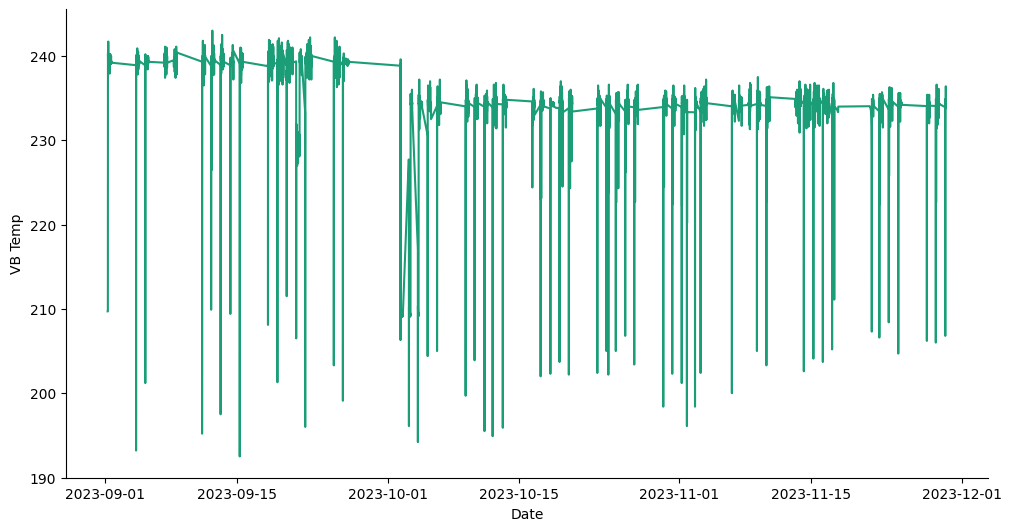

In [ ]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['suhu_sealing_vertical_bawah']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_mean.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('VB Temp')

#### Save Data

It's a good practice to save cleaned and processed data separately, as it allows you to reproduce the modeling step without having to repeat the data cleaning process every time. Additionally, it provides a checkpoint in case you need to revisit or modify the data cleaning steps in the future.

In [ ]:
# Export the DataFrame to a CSV file
data_mean.to_csv('data_mean187window_vbtemp.csv', index=False)

## Suhu Sealing Vertikal Atas



### Test Rolling Average

In [ ]:
### Import Data

file_path = '/content/drive/MyDrive/suhu_sealing_vertical_atas.csv'
data_avg = pd.read_csv(file_path)

data_avg.head(15)


,datetime,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,34.9
1,2023-09-01 06:31:14,38.2
2,2023-09-01 06:36:14,91.6
3,2023-09-01 06:41:14,129.5
4,2023-09-01 06:46:14,158.2
5,2023-09-01 06:51:14,180.6
6,2023-09-01 06:56:14,198.8
7,2023-09-01 07:01:14,213.2
8,2023-09-01 07:06:14,225.0
9,2023-09-01 07:11:14,229.6


#### Find Threshold

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-56-3f727a684f6e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cluster'] = cluster_labels


Initial K-means Calculated threshold: 191.0
Refined Statistical Calculated threshold: 151.55


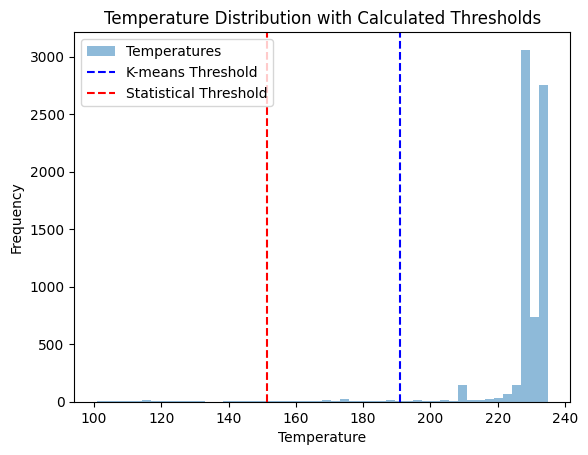

In [ ]:
# Assuming data_mean is already loaded
data_avg['datetime'] = pd.to_datetime(data_avg['datetime'])

# Filtering to exclude clear outliers, focusing on a reasonable temperature range
filtered_data = data_avg[data_avg['suhu_sealing_vertical_atas'] > 100]

# Prepare data for clustering
temperatures = filtered_data['suhu_sealing_vertical_atas'].values.reshape(-1, 1)

# Apply K-means clustering to segregate operational from non-operational temperatures
kmeans = KMeans(n_clusters=2, random_state=0).fit(temperatures)
centers = kmeans.cluster_centers_.squeeze()
cluster_labels = kmeans.predict(temperatures)
filtered_data['cluster'] = cluster_labels

# Determine the non-operational cluster based on the lower mean temperature
non_operational_cluster = centers.argmin()
non_operational_temps = filtered_data[filtered_data['cluster'] == non_operational_cluster]['suhu_sealing_vertical_atas']

# Use K-means results to filter the dataset further for statistical analysis
# We focus on the non-operational temperatures, which are now more accurately identified
threshold_kmeans = non_operational_temps.max()

# Apply a statistical method to refine this threshold
# Calculate the 50th percentile of the non-operational temperatures
lower_quartile = non_operational_temps.quantile(0.50)

# Adjust the threshold to be slightly more inclusive of the preheating phase
threshold_statistical = lower_quartile - 5  # Adjusting by 5 degrees, can be tuned

print(f"Initial K-means Calculated threshold: {threshold_kmeans}")
print(f"Refined Statistical Calculated threshold: {threshold_statistical}")

# Plotting for visualization
plt.hist(filtered_data['suhu_sealing_vertical_atas'], bins=50, alpha=0.5, label='Temperatures')
plt.axvline(x=threshold_kmeans, color='blue', linestyle='--', label='K-means Threshold')
plt.axvline(x=threshold_statistical, color='red', linestyle='--', label='Statistical Threshold')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution with Calculated Thresholds')
plt.show()


In [ ]:
# Set values below the threshold to the threshold value
data_avg.loc[data_avg['suhu_sealing_vertical_atas'] < threshold_kmeans, 'suhu_sealing_vertical_atas'] = np.nan

data_avg.head(15)

,datetime,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,NaN
1,2023-09-01 06:31:14,NaN
2,2023-09-01 06:36:14,NaN
3,2023-09-01 06:41:14,NaN
4,2023-09-01 06:46:14,NaN
5,2023-09-01 06:51:14,NaN
6,2023-09-01 06:56:14,198.8
7,2023-09-01 07:01:14,213.2
8,2023-09-01 07:06:14,225.0
9,2023-09-01 07:11:14,229.6


#### Fill value below threshlod with rolling average value

This code is used to fill in missing or non-operational temperature values in the 'suhu_sealing_vertical_atas' column using a rolling average technique.

In [ ]:
# Set values below the threshold to NaN
data_avg.loc[data_avg['suhu_sealing_vertical_atas'] < threshold_kmeans, 'suhu_sealing_vertical_atas'] = np.nan

# Menghitung rolling mean dan mengisi NaN yang tersisa
rolling_mean = data_avg['suhu_sealing_vertical_atas'].rolling(window=187, min_periods=1).mean()
data_avg['suhu_sealing_vertical_atas'] = data_avg['suhu_sealing_vertical_atas'].fillna(rolling_mean)

print(data_avg.head(15))

              datetime  suhu_sealing_vertical_atas
0  2023-09-01 06:29:25                         NaN
1  2023-09-01 06:31:14                         NaN
2  2023-09-01 06:36:14                         NaN
3  2023-09-01 06:41:14                         NaN
4  2023-09-01 06:46:14                         NaN
5  2023-09-01 06:51:14                         NaN
6  2023-09-01 06:56:14                       198.8
7  2023-09-01 07:01:14                       213.2
8  2023-09-01 07:06:14                       225.0
9  2023-09-01 07:11:14                       229.6
10 2023-09-01 07:16:14                       230.0
11 2023-09-01 07:32:19                       229.0
12 2023-09-01 07:37:19                       229.0
13 2023-09-01 07:42:19                       229.2
14 2023-09-01 07:47:19                       229.6


In [ ]:
# Count the number of null values in the 'suhu_sealing_vertical_bawah' column
num_null_values = data_avg['suhu_sealing_vertical_atas'].isna().sum()
print(f"Number of null values in 'suhu_sealing_vertical_atas': {num_null_values}")

Number of null values in 'suhu_sealing_vertical_atas': 6


In [ ]:
data_avg['suhu_sealing_vertical_atas'] = data_avg['suhu_sealing_vertical_atas'].bfill()

print(data_avg.head(15))

              datetime  suhu_sealing_vertical_atas
0  2023-09-01 06:29:25                       198.8
1  2023-09-01 06:31:14                       198.8
2  2023-09-01 06:36:14                       198.8
3  2023-09-01 06:41:14                       198.8
4  2023-09-01 06:46:14                       198.8
5  2023-09-01 06:51:14                       198.8
6  2023-09-01 06:56:14                       198.8
7  2023-09-01 07:01:14                       213.2
8  2023-09-01 07:06:14                       225.0
9  2023-09-01 07:11:14                       229.6
10 2023-09-01 07:16:14                       230.0
11 2023-09-01 07:32:19                       229.0
12 2023-09-01 07:37:19                       229.0
13 2023-09-01 07:42:19                       229.2
14 2023-09-01 07:47:19                       229.6


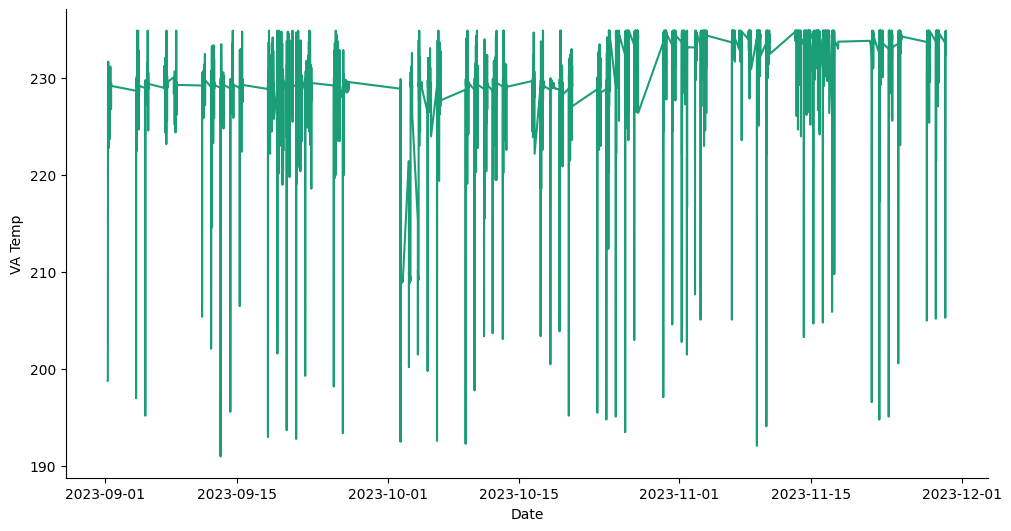

In [ ]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['suhu_sealing_vertical_atas']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_avg.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('VA Temp')

#### Save Data

It's a good practice to save cleaned and processed data separately, as it allows you to reproduce the modeling step without having to repeat the data cleaning process every time. Additionally, it provides a checkpoint in case you need to revisit or modify the data cleaning steps in the future.

In [ ]:
# Export the DataFrame to a CSV file
data_avg.to_csv('data_mean187window_vatemp.csv', index=False)